standard amplitude-time waveform

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

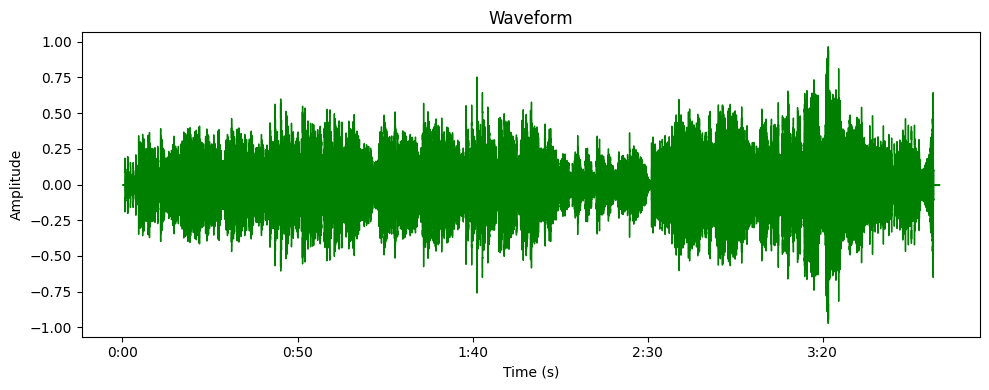

In [3]:
def plot_waveform(file_path, color='blue'):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)  # y is the waveform, sr is the sample rate

    # Plotting the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color=color)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Test the function
file_path = "data/continuous/42 Baldur's Gate 3 OST - I Want To Live.wav"
plot_waveform(file_path, color='green')

Layered waveform with different colors for different frequency ranges.

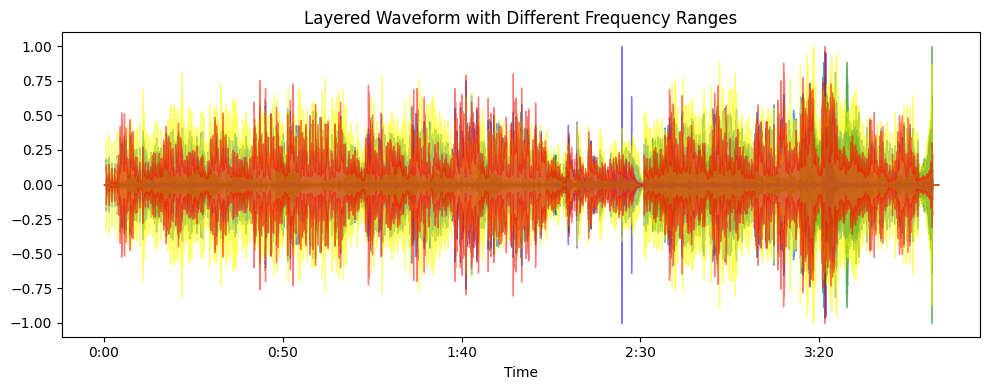

In [4]:
def plot_layered_waveform(audio_file, freq_ranges, colors):
    y, sr = librosa.load(audio_file)

    D = np.abs(librosa.stft(y))
    times = librosa.times_like(D[0, :], sr=sr)

    plt.figure(figsize=(10, 4))

    # Plot full waveform as base layer
    librosa.display.waveshow(y, sr=sr, alpha=0.7)

    # Plot each frequency range layer
    for (fmin, fmax), color in zip(freq_ranges, colors):
        start_bin, end_bin = [librosa.hz_to_mel(f) for f in [fmin, fmax]]
        freq_mask = (D > 0) & (np.tile(np.arange(D.shape[0])[:, np.newaxis], (1, D.shape[1])) >= start_bin) & \
                    (np.tile(np.arange(D.shape[0])[:, np.newaxis], (1, D.shape[1])) <= end_bin)
        intensity = np.sum(D * freq_mask, axis=0)
        intensity = intensity / np.max(intensity)  # normalize intensity
        plt.fill_between(times, -1 * intensity, 1 * intensity, color=color, alpha=0.5)

    plt.title('Layered Waveform with Different Frequency Ranges')
    plt.tight_layout()
    plt.show()

freq_ranges = [(0, 150), (150, 600), (600, 4000), (4000, 22050)]
colors = ['blue', 'green', 'yellow', 'red']
plot_layered_waveform(file_path, freq_ranges, colors)

3D waveform that twists and rotates with the progression of time

In [5]:
from mpl_toolkits.mplot3d import Axes3D

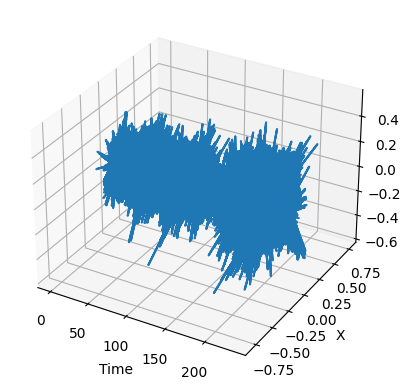

In [6]:
def audio_3d_waveform(filename):
    # Load the audio file
    # y represents the amplitude of the audio signal over time
    y, sr = librosa.load(filename)

    # Downsample for visualization purposes
    y = librosa.core.resample(y, orig_sr=sr, target_sr=sr//10)
    sr = sr // 10  # update the sample rate after resampling

    # Create a time array
    t = np.linspace(0, len(y)/sr, num=len(y))

    # Create a spiral in time
    x = y * np.cos(t)
    z = y * np.sin(t)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(t, x, z)
    ax.set_xlabel("Time")
    ax.set_ylabel("X")
    ax.set_zlabel("Z")

    plt.show()

# Call the function
audio_3d_waveform(file_path)

Spectrogram

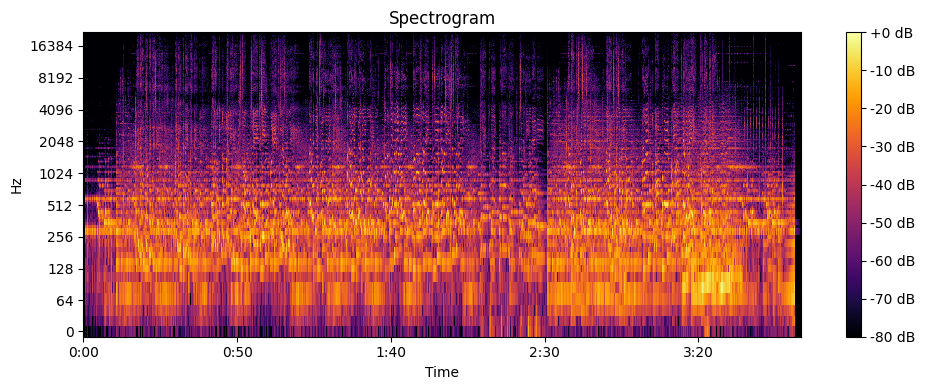

In [7]:
def display_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the STFT of the audio signal
    D = librosa.stft(y)

    # Convert amplitude to dB
    dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(dB, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

display_spectrogram(file_path)

vertical columns representing frequency bands, with height showing intensity.

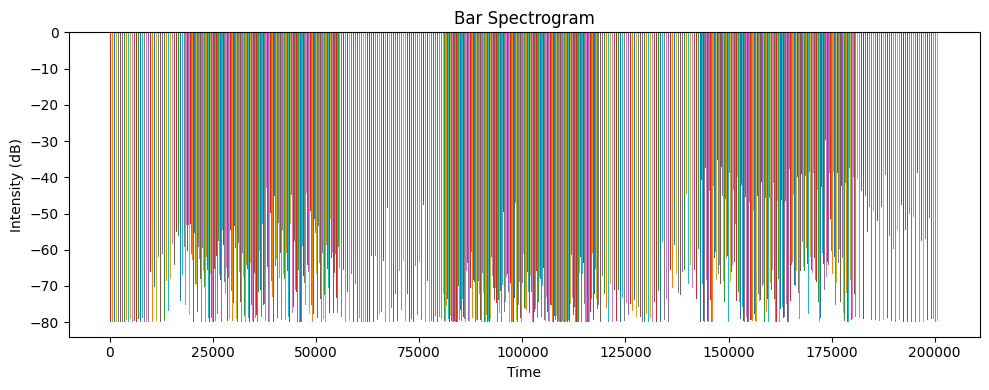

In [8]:
def display_bar_spectrogram(audio_file, num_bands=10):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the STFT of the audio signal
    D = librosa.stft(y)

    # Convert amplitude to dB
    dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Calculate frequency bins for bands
    freqs = librosa.fft_frequencies(sr=sr, n_fft=D.shape[0]*2)
    band_bins = np.linspace(0, len(freqs)-1, num_bands+1, dtype=int)

    # Compute the mean intensity in each band for each time frame
    band_means = []
    for i in range(num_bands):
        band_data = dB[band_bins[i]:band_bins[i+1], :]
        band_means.append(np.mean(band_data, axis=0))
    band_means = np.array(band_means)

    # Display the bar spectrogram
    plt.figure(figsize=(10, 4))
    for time in range(band_means.shape[1]):
        plt.bar(np.arange(num_bands) + time*num_bands, band_means[:, time])

    plt.title('Bar Spectrogram')
    plt.ylabel('Intensity (dB)')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

display_bar_spectrogram(file_path)

Spiral-based spectrogram where time progresses outwards

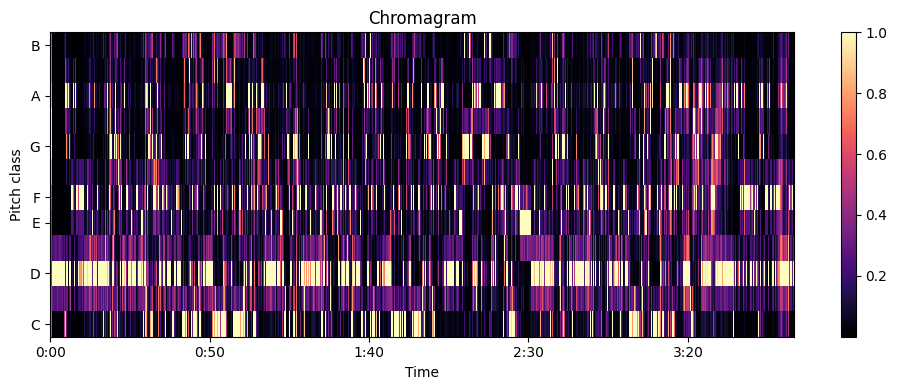

In [9]:
def display_chromagram(audio_file):
    y, sr = librosa.load(audio_file)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Display the chromagram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')
    plt.tight_layout()
    plt.show()

display_chromagram(file_path)